In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [43]:
import pandas as pd
ad = pd.read_csv("insurance.csv")
df = ad.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [46]:
df.isnull().values.any()

False

In [47]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
corr  #en yüksek korelasyon age ve charges arasında

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


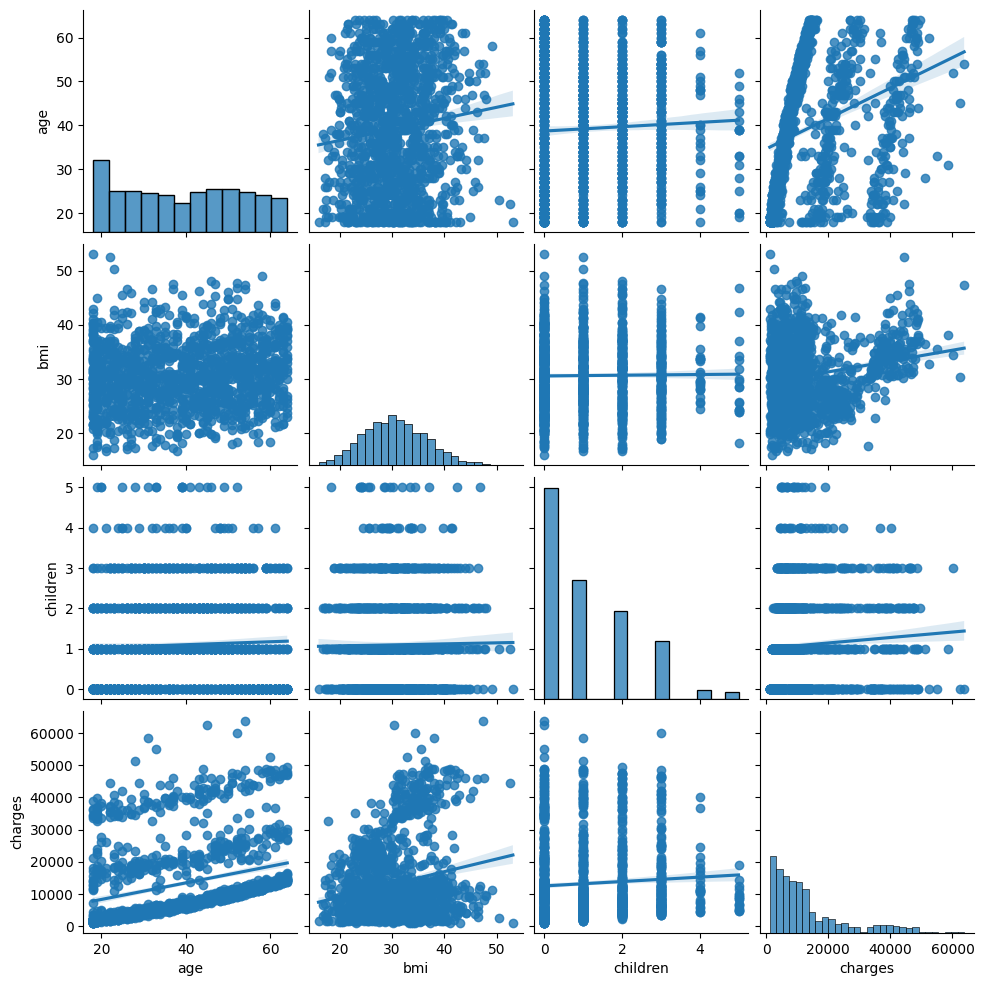

In [48]:
import seaborn as sns
sns.pairplot(df, kind  ="reg");

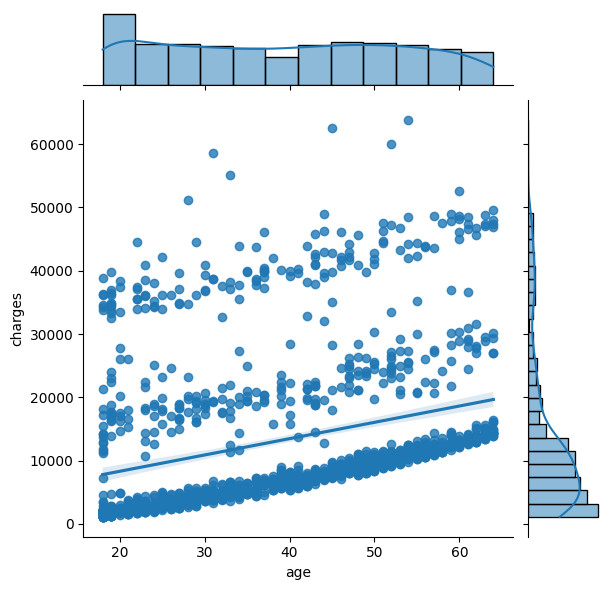

In [16]:
sns.jointplot(x = "age", y = "charges", data = df, kind = "reg")

Basit Doğrusal Fonksiyon

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
X = df[["age"]]
y = df["charges"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_

3165.8850060630284

In [20]:
model.coef_

array([257.72261867])

In [21]:
model.score(X,y)

0.08940589967885804

In [22]:
model.predict(X)[0:10]

array([ 8062.61476073,  7804.89214207, 10382.11832874, 11670.73142207,
       11413.0088034 , 11155.28618474, 15021.12546474, 12701.62189674,
       12701.62189674, 18629.24212608])

In [23]:
y[0:10]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [49]:
X = df[["age"]]
y = df["charges"]
reg = LinearRegression()
model = reg.fit(X, y)

In [25]:
model.predict([[30]]) #30 yaşındaki birinin harcamaları tahmini

array([10897.56356607])

In [26]:
yeni_veri = [[7],[17],[23]] #okula başlama ve bitirme dönemleri tahmini harcamalar

In [27]:
model.predict(yeni_veri)

array([4969.94333673, 7547.1695234 , 9093.5052354 ])

HATA TESPİTİ    

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
reg.predict(X)[0:10]

array([ 8062.61476073,  7804.89214207, 10382.11832874, 11670.73142207,
       11413.0088034 , 11155.28618474, 15021.12546474, 12701.62189674,
       12701.62189674, 18629.24212608])

In [30]:
y[0:10]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [31]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

k_t

,gercek_y,tahmin_y
0,16884.92400,8062.614761
1,1725.55230,7804.892142
2,4449.46200,10382.118329
3,21984.47061,11670.731422
4,3866.85520,11413.008803
5,3756.62160,11155.286185
6,8240.58960,15021.125465
7,7281.50560,12701.621897
8,6406.41070,12701.621897
9,28923.13692,18629.242126


In [32]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,16884.92400,8062.614761,8822.309239
1,1725.55230,7804.892142,-6079.339842
2,4449.46200,10382.118329,-5932.656329
3,21984.47061,11670.731422,10313.739188
4,3866.85520,11413.008803,-7546.153603
5,3756.62160,11155.286185,-7398.664585
6,8240.58960,15021.125465,-6780.535865
7,7281.50560,12701.621897,-5420.116297
8,6406.41070,12701.621897,-6295.211197
9,28923.13692,18629.242126,10293.894794


In [33]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,16884.92400,8062.614761,8822.309239,7.783314e+07
1,1725.55230,7804.892142,-6079.339842,3.695837e+07
2,4449.46200,10382.118329,-5932.656329,3.519641e+07
3,21984.47061,11670.731422,10313.739188,1.063732e+08
4,3866.85520,11413.008803,-7546.153603,5.694443e+07
5,3756.62160,11155.286185,-7398.664585,5.474024e+07
6,8240.58960,15021.125465,-6780.535865,4.597567e+07
7,7281.50560,12701.621897,-5420.116297,2.937766e+07
8,6406.41070,12701.621897,-6295.211197,3.962968e+07
9,28923.13692,18629.242126,10293.894794,1.059643e+08


In [34]:
np.sum(k_t["hata_kare"])

588993093.5467993

In [35]:
np.sqrt(np.mean(k_t["hata_kare"]))

7674.588546279203

ÇOKLU DOĞRUSAL REGRESYON


--MODELLING

In [50]:

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [55]:
import pandas as pd
ad = pd.read_csv("insurance.csv")
df2 = ad.copy()
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
df2['sex'] = df2['sex'].map({'female': 0, 'male': 1})

df2['smoker'] = df2['smoker'].map({'yes': 1, 'no': 0})

df2['region'] = df2['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

print(df2.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       0  16884.92400
1   18    1  33.770         1       0       1   1725.55230
2   28    1  33.000         3       0       1   4449.46200
3   33    1  22.705         0       0       2  21984.47061
4   32    1  28.880         0       0       2   3866.85520


In [59]:
X = df2.drop("charges", axis = 1)
y = df2["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df2.copy()
print("training", training.shape)

X_train (1070, 6)
y_train (1070,)
X_test (268, 6)
y_test (268,)
training (1338, 7)


In [60]:

lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [61]:

model.intercept_

-12760.459365293491

In [62]:

model.coef_ # 

array([ 2.57056264e+02, -1.87914567e+01,  3.35781491e+02,  4.25091456e+02,
        2.36478181e+04,  2.71284266e+02])

In [ ]:
Tahmin

In [63]:

new_data = [[30], [1],[21],[0],[1],[2]] #30 yaşında bim' 21 olan sigara içen biri için harcama tahmini
new_data = pd.DataFrame(new_data).T

In [64]:
model.predict(new_data)

array([26174.23502633])

In [65]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [66]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [67]:
rmse #cok yüksek

6105.789320191615

In [68]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [69]:
rmse

5799.587091438355

Model Tunning


In [71]:
X = df2.drop('charges', axis=1)
y = df2["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [72]:
model.score(X_train, y_train)

0.7513733233356823

In [73]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

6101.2505529905275

In [74]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

5626.223721550143

PCR

--Modelling

In [75]:
import pandas as pd
ad = pd.read_csv("insurance.csv")
df3 = ad.copy()
df3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [77]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [80]:
dms = pd.get_dummies(df3[['sex', 'smoker', 'region']]) #one-hot encoding
dms.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,True,False,False,True,False,False,False,True
1,False,True,True,False,False,False,True,False
2,False,True,True,False,False,False,True,False
3,False,True,True,False,False,True,False,False
4,False,True,True,False,False,True,False,False


In [81]:
y = df3["charges"]


In [82]:
X_ = df3.drop(["charges","sex","smoker","region"], axis = 1).astype("float64")

In [83]:

X_.head()

,age,bmi,children
0,19.0,27.900,0.0
1,18.0,33.770,1.0
2,28.0,33.000,3.0
3,33.0,22.705,0.0
4,32.0,28.880,0.0


In [84]:
X = pd.concat([X_, dms[["sex_male", "smoker_no"]]], axis = 1)
X.head()

,age,bmi,children,sex_male,smoker_no
0,19.0,27.900,0.0,False,False
1,18.0,33.770,1.0,True,True
2,28.0,33.000,3.0,True,True
3,33.0,22.705,0.0,True,True
4,32.0,28.880,0.0,True,True


In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   float64
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   float64
 3   sex_male   1338 non-null   bool   
 4   smoker_no  1338 non-null   bool   
dtypes: bool(2), float64(3)
memory usage: 34.1 KB


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df3.copy()

print("training", training.shape)

X_train (1003, 5)
y_train (1003,)
X_test (335, 5)
y_test (335,)
training (1338, 7)


In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [88]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [89]:
X_reduced_train[0:1,:]

array([[ 1.69127064, -0.32592751, -0.4601335 , -1.17249043, -0.11372038]])

In [90]:
X_reduced_train.shape

(1003, 5)

In [91]:
X_reduced_train[:,0]

array([ 1.69127064,  0.56568038, -1.50158738, ..., -0.18573027,
       -1.48000483, -0.51564548])

In [92]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5] # Verinin ½ kaçını ifade ediyor

array([ 22.56,  43.9 ,  63.77,  82.69, 100.  ])

In [93]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10] 

array([ 22.56,  43.9 ,  63.77,  82.69, 100.  ])

In [94]:
lm = LinearRegression()

In [95]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [96]:
pcr_model.intercept_

13267.935817337988

In [97]:
pcr_model.coef_

array([-1751.90952852,  6768.0618618 , -2003.966619  ,  6545.22211802,
       -3584.34393122])

TAHMİN

In [98]:
y_pred = pcr_model.predict(X_reduced_train)

In [99]:
y_pred[0:5]

array([ 1754.57996913,  4533.44578628, 14466.05069057, 35868.37853991,
        9996.9583838 ])

In [100]:
np.sqrt(mean_squared_error(y_train, y_pred))

6092.54026520953

In [102]:
df3["charges"].mean()

13270.422265141257

In [103]:
#r2_score(y_train, y_pred)

In [104]:
pca2 = PCA()

In [105]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [106]:
y_pred = pcr_model.predict(X_reduced_test)

In [107]:
np.sqrt(mean_squared_error(y_test, y_pred))

15162.132176975787

Model Tuning


In [108]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

15162.132176975787


In [109]:
from sklearn import model_selection

In [110]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [111]:
lm = LinearRegression()

In [112]:
RMSE = []

In [113]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

In [114]:
import matplotlib.pyplot as plt

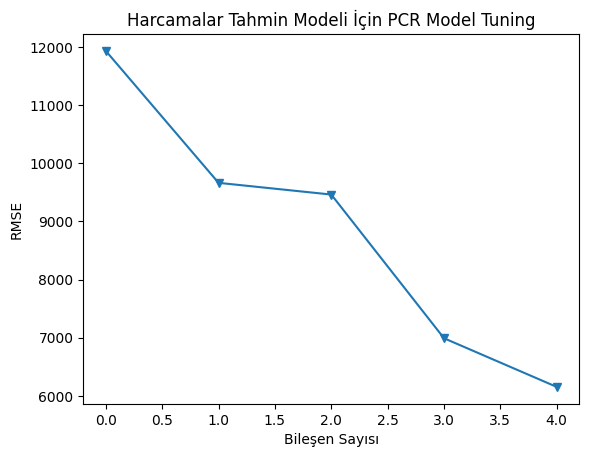

In [116]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Harcamalar Tahmin Modeli İçin PCR Model Tuning');

In [117]:
lm = LinearRegression()

In [118]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:6])
print(np.sqrt(mean_squared_error(y_train, y_pred)))

6092.54026520953


In [119]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [120]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

15162.132176975787


PLS

--Model

In [121]:
hit = pd.read_csv("insurance.csv")
df4 = hit.copy()
df4 = df4.dropna()
ms = pd.get_dummies(df[['sex', 'smoker', 'region']])
y = df4["charges"]
X_ = df4.drop(['charges', 'sex', 'smoker', 'region'], axis=1).astype('float64')
X = pd.concat([X_, dms[['sex_male', 'smoker_no', 'region_southeast']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [122]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [123]:
pls_model = PLSRegression().fit(X_train, y_train)

In [124]:
pls_model.coef_

array([[ 3631.22165117,  1898.83263035,   591.26172844,    91.42984358,
        -9574.3480189 ,  -134.3618782 ]])

TAHMİN

In [125]:
X_train.head()

,age,bmi,children,sex_male,smoker_no,region_southeast
693,24.0,23.655,0.0,True,True,False
1297,28.0,26.510,2.0,False,True,True
634,51.0,39.700,1.0,True,True,False
1022,47.0,36.080,1.0,True,False,True
178,46.0,28.900,2.0,False,True,False


In [126]:
pls_model.predict(X_train)[0:10]

array([ 1919.34490579,  4347.53906348, 14460.46469748, 35664.01156457,
       10064.81646972, 12633.9205342 ,  5169.36080867,  5083.63906566,
        4643.61781675,  2224.61963246])

In [127]:
y_train[0:10]

693      2352.96845
1297     4340.44090
634      9391.34600
1022    42211.13820
178      8823.27900
287     14256.19280
1290     7133.90250
1113     5312.16985
294      3906.12700
471      2203.47185
Name: charges, dtype: float64

In [128]:
y_pred = pls_model.predict(X_train)

In [129]:
np.sqrt(mean_squared_error(y_train, y_pred))

6092.386708342937

In [130]:
#r2_score(y_train, y_pred)

In [131]:
y_pred = pls_model.predict(X_test)

In [132]:
np.sqrt(mean_squared_error(y_test, y_pred))

5941.0469804590775

In [133]:
df["charges"].mean()

13270.422265141257

MODEL TUNNING

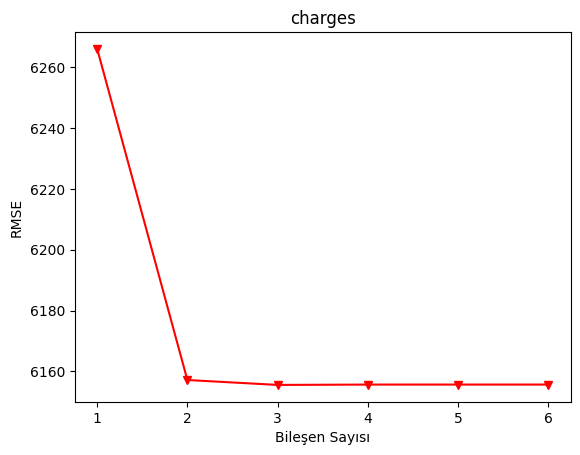

In [134]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('charges');

In [135]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [136]:
y_pred = pls_model.predict(X_test)

In [137]:
np.sqrt(mean_squared_error(y_test, y_pred))

5941.0469804590775

Ridge Regresyon


In [138]:
hit = pd.read_csv("insurance.csv")
df5 = hit.copy()
df5 = df5.dropna()
ms = pd.get_dummies(df[['sex', 'smoker', 'region']])
y = df5["charges"]
X_ = df5.drop(['charges', 'sex', 'smoker', 'region'], axis=1).astype('float64')
X = pd.concat([X_, dms[['sex_male', 'smoker_no', 'region_southeast']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [139]:
from sklearn.linear_model import Ridge

In [140]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [141]:
ridge_model

Ridge(alpha=0.1)

In [142]:
ridge_model.coef_

array([   259.48661062,    333.91477951,    431.05325627,     57.63902311,
       -23631.15937536,   -358.26336364])

In [143]:
10**np.linspace(10,-2,100)*0.5 

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

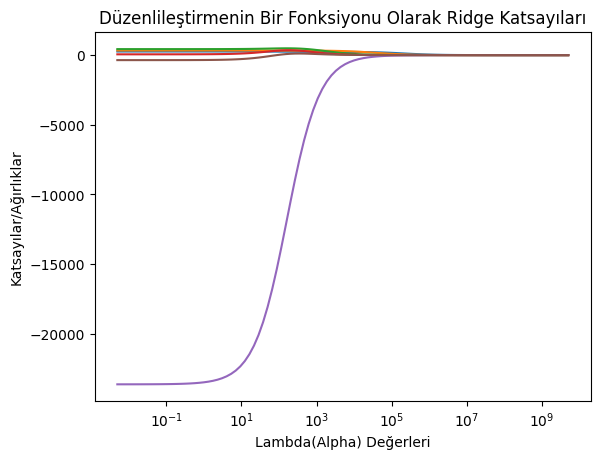

In [144]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

TAHMİN


In [145]:
y_pred = ridge_model.predict(X_test)

In [146]:
np.sqrt(mean_squared_error(y_test, y_pred))

5940.181923674214

Model Tuning

In [147]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [148]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

# Verileri normalize etmek için bir StandardScaler oluşturun
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# RidgeCV modelini oluşturun, normalize edilmiş verilerle eğitin
ridge_cv = RidgeCV(alphas=lambdalar, scoring="neg_mean_squared_error")
ridge_cv.fit(X_scaled, y)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [153]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [154]:
ridge_cv.alpha_

0.18824679033962358

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Verileri normalize etmek için bir StandardScaler oluşturun
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# En iyi alpha değerini kullanarak Ridge regresyon modelini oluşturun ve eğitin
ridge_tuned = Ridge(alpha=ridge_cv.alpha_).fit(X_train_scaled, y_train)


In [158]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))


203930.08502482818

Lasso Regresyon¶


In [159]:

hit = pd.read_csv("insurance.csv")
df6 = hit.copy()
df6 = df6.dropna()
ms = pd.get_dummies(df[['sex', 'smoker', 'region']])
y = df6["charges"]
X_ = df6.drop(['charges', 'sex', 'smoker', 'region'], axis=1).astype('float64')
X = pd.concat([X_, dms[['sex_male', 'smoker_no', 'region_southeast']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [160]:
from sklearn.linear_model import Lasso

In [161]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [162]:
lasso_model

Lasso(alpha=0.1)

In [163]:
lasso_model.coef_

array([   259.501609  ,    333.91502062,    430.88885056,     56.65232112,
       -23645.09456981,   -358.527127  ])

Text(0, 0.5, 'weights')

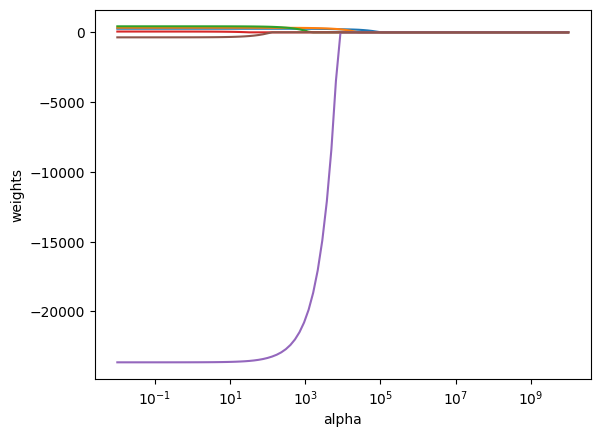

In [164]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Tahmin

In [165]:
lasso_model.predict(X_test)

array([ 8570.14164552,  6990.66773831, 36854.98377044,  9507.51598794,
       26915.32581544, 11260.03115755,    73.1081556 , 16946.28504895,
         663.91665386, 11269.40055066, 28551.46911105,  9396.93736729,
        5102.93474001, 38338.74234811, 40201.59984293, 37028.70488625,
       15094.80339043, 35769.82001694,  9000.23296123, 31405.44998147,
        4303.68668705, 10587.10977672,  2762.68041429,  6625.00368908,
       11281.91827679, 12549.91065512, 14914.99465901,  6074.70751683,
        9564.97376789,  2057.83377293,  9511.81076169, 13042.91813949,
        4359.10432633,  3363.80037837,  4876.51451959, 12650.19301716,
        2320.26007926,  9197.99804938, 33251.91743121, 32494.45615959,
        4259.42530885,  4289.29336143, 14541.61758801, 11493.20457237,
        8685.39887469, 12605.28006499,  5165.35452888,  3518.82267307,
       35429.85968957,  9047.93131112, 15735.67038374,  2231.60805761,
       12266.19425991,  1075.69209215, 13351.39035332, 12240.00267961,
      

In [166]:
y_pred = lasso_model.predict(X_test)

In [167]:
np.sqrt(mean_squared_error(y_test, y_pred))

5940.184005027624

Model Tuning

In [169]:
from sklearn.linear_model import LassoCV

In [171]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         )

In [172]:

lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000)

In [173]:

lasso_cv_model.alpha_

80.830193758834

In [174]:

lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [175]:

lasso_tuned.fit(X_train, y_train)


Lasso(alpha=80.830193758834)

In [176]:

y_pred = lasso_tuned.predict(X_test)

In [177]:
np.sqrt(mean_squared_error(y_test, y_pred))

5964.745789639681

ElasticNet Regresyonu

Modeling

In [178]:
hit = pd.read_csv("insurance.csv")
df7 = hit.copy()
df7 = df7.dropna()
ms = pd.get_dummies(df[['sex', 'smoker', 'region']])
y = df7["charges"]
X_ = df7.drop(['charges', 'sex', 'smoker', 'region'], axis=1).astype('float64')
X = pd.concat([X_, dms[['sex_male', 'smoker_no', 'region_southeast']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [179]:
X.head()

,age,bmi,children,sex_male,smoker_no,region_southeast
0,19.0,27.900,0.0,False,False,False
1,18.0,33.770,1.0,True,True,True
2,28.0,33.000,3.0,True,True,True
3,33.0,22.705,0.0,True,True,False
4,32.0,28.880,0.0,True,True,False


In [180]:
from sklearn.linear_model import ElasticNet

In [181]:
enet_model = ElasticNet().fit(X_train, y_train)

In [182]:
enet_model.coef_

array([  240.23288563,   324.51603491,   445.63410836,   282.21700968,
       -5802.21416897,   107.30938884])

In [183]:
enet_model.intercept_

-2115.861473465471

Tahmin

In [185]:
enet_model

ElasticNet()

In [186]:
enet_model.predict(X_test)

array([11953.36360635, 10472.27960812, 21983.65680523, 13106.42174992,
       13089.33219742, 14899.43148452,  3952.82771046, 20039.82635063,
        4419.32739871, 14782.8201296 , 14628.43568188, 13031.90340255,
        9204.05101091, 24404.53406737, 25966.83421118, 23092.53316561,
       18702.25772877, 21615.05000693, 12788.25537282, 16938.76620704,
        8354.06728404, 14164.64640397,  6793.85365539, 10284.4086109 ,
       14555.86186565, 15659.68420228, 17886.41032052,  9770.4020558 ,
       12896.26472735,  6576.55598952, 12982.09603892, 16102.92164931,
        8549.99848184,  7099.90814789,  8791.31154918, 16091.98199003,
        6139.67238569, 12560.60199168, 18652.45460988, 18790.64734479,
        8155.67832465,  8268.47665379, 17598.2741108 , 14800.05986806,
       12891.85244649, 15907.70668763,  8931.55742643,  7310.3884716 ,
       21613.42310777, 13268.10900739, 19103.83760813,  6772.312751  ,
       15578.32805694,  5166.31472053, 17097.57943314, 15687.26374626,
      

In [188]:
y_pred = enet_model.predict(X_test)

In [189]:
np.sqrt(mean_squared_error(y_test, y_pred))

9533.747399117898

In [ ]:
#r2_score(y_test, y_pred)

Model Tuning

In [190]:
from sklearn.linear_model import ElasticNetCV

In [191]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [192]:
enet_cv_model.alpha_

99.19331475924518

In [193]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [194]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [195]:
y_pred = enet_tuned.predict(X_test)

In [196]:
np.sqrt(mean_squared_error(y_test, y_pred))

11544.299591234047